#Mounting Google Drive (not required)
it is not required because i have already provided a csv file containing the MFCC values of dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Loading MFCC values of the dataset into NumPy arrays (not required)
it is not required because i have already provided a csv file containing the MFCC values of dataset

In [7]:
def extract_mel_spectrogram_features(audio_path, n_mels=128, fmax=8000):
    y, sr = librosa.load(audio_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
    S_dB = librosa.power_to_db(S, ref=np.max)
    mel_mean = np.mean(S_dB, axis=1)
    mel_std = np.std(S_dB, axis=1)
    mel_median = np.median(S_dB, axis=1)
    mel_features = np.concatenate((mel_mean, mel_std, mel_median))

    return mel_features

In [8]:
def extract_features(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)


In [10]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


X = []
y = []

labels = ["a","am","bm","c","d","dm","e","em","f","g"]

base_dir = '/content/drive/MyDrive/Guitar_Only/'


for chord in labels:
  path = base_dir + chord
  for _,_,files in os.walk(path):
    for f_name in files:
      print(f_name)
      p=path+"/"+f_name
      mfcc = extract_features(p)
      spectro = extract_mel_spectrogram_features(p)
      features=  np.hstack((mfcc, spectro))
      X.append(features)
      y.append(chord)




X = np.array(X)
y = np.array(y)


a38.wav
a36.wav
a34.wav
a30.wav
a32.wav
a33.wav
a35.wav
a31.wav
a3.wav
a29.wav
a26.wav
a24.wav
a23.wav
a27.wav
a25.wav
a28.wav
a22.wav
a21.wav
a200.wav
a20.wav
a197.wav
a195.wav
a199.wav
a196.wav
a198.wav
a95.wav
a93.wav
a92.wav
a91.wav
a89.wav
a87.wav
a88.wav
a9.wav
a86.wav
a90.wav
a85.wav
a83.wav
a84.wav
a81.wav
a82.wav
a76.wav
a8.wav
a78.wav
a79.wav
a80.wav
a77.wav
a75.wav
a73.wav
a74.wav
a68.wav
a70.wav
a7.wav
a69.wav
a71.wav
a72.wav
a67.wav
a65.wav
a66.wav
a6.wav
a62.wav
a59.wav
a60.wav
a63.wav
a61.wav
a64.wav
a58.wav
a57.wav
a55.wav
a56.wav
a54.wav
a52.wav
a50.wav
a51.wav
a49.wav
a53.wav
a5.wav
a48.wav
a47.wav
a46.wav
a44.wav
a42.wav
a41.wav
a4.wav
a43.wav
a45.wav
a40.wav
a39.wav
a37.wav
a10.wav
a115.wav
a111.wav
a112.wav
a104.wav
a101.wav
a108.wav
a1.wav
a110.wav
a113.wav
a116.wav
a11.wav
a105.wav
a102.wav
a109.wav
a103.wav
a106.wav
a100.wav
a114.wav
a107.wav
a122.wav
a133.wav
a13.wav
a135.wav
a121.wav
a131.wav
a129.wav
a126.wav
a123.wav
a120.wav
a117.wav
a139.wav
a138.wav
a119.

In [12]:
print(X.shape)
print(y.shape)
print(X)
print(y)

(2000, 397)
(2000,)
[[-558.45233   157.9392     16.078571 ...  -80.        -80.
   -80.      ]
 [-528.4352    165.0502     18.06555  ...  -75.8769    -75.0939
   -71.76906 ]
 [-544.8797    163.34552    14.571755 ...  -80.        -80.
   -80.      ]
 ...
 [-644.2968    175.21417    38.4652   ...  -80.        -80.
   -80.      ]
 [-603.5807    158.33488    10.376193 ...  -76.43231   -77.37602
   -78.40782 ]
 [-585.7396    143.12572    15.012049 ...  -73.07535   -76.538826
   -77.89822 ]]
['a' 'a' 'a' ... 'g' 'g' 'g']


#Loading MFCC values to CSV (not required)
so that we do not have to calculate MFCC every time and also creating a csv dataset

In [13]:
import numpy as np
import pandas as pd

combined_array = np.column_stack((X, y))

df = pd.DataFrame(combined_array, columns=[f'X{i+1}' for i in range(X.shape[1])] + ['y'])

df.to_csv('output_new.csv', index=False)

print("CSV file saved successfully.")


CSV file saved successfully.


#Reading the data from csv to NumPy arrays
#Run the code form here, add the path of csv to output.csv


In [12]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/output_new.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

print("X_retrieved:")
print(X)

print("y_retrieved:")
print(y)


X_retrieved:
[[-558.45233   157.9392     16.078571 ...  -80.        -80.
   -80.      ]
 [-528.4352    165.0502     18.06555  ...  -75.8769    -75.0939
   -71.76906 ]
 [-544.8797    163.34552    14.571755 ...  -80.        -80.
   -80.      ]
 ...
 [-644.2968    175.21417    38.4652   ...  -80.        -80.
   -80.      ]
 [-603.5807    158.33488    10.376193 ...  -76.43231   -77.37602
   -78.40782 ]
 [-585.7396    143.12572    15.012049 ...  -73.07535   -76.538826
   -77.89822 ]]
y_retrieved:
['a' 'a' 'a' ... 'g' 'g' 'g']


# Applying Random Forest Classifier

In [13]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

def extract_mfcc(file_path, n_mfcc=13):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.flatten()

X, y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Random Forest Classifier:", accuracy)


Accuracy with Random Forest Classifier: 0.9925


#Confusion Matrix

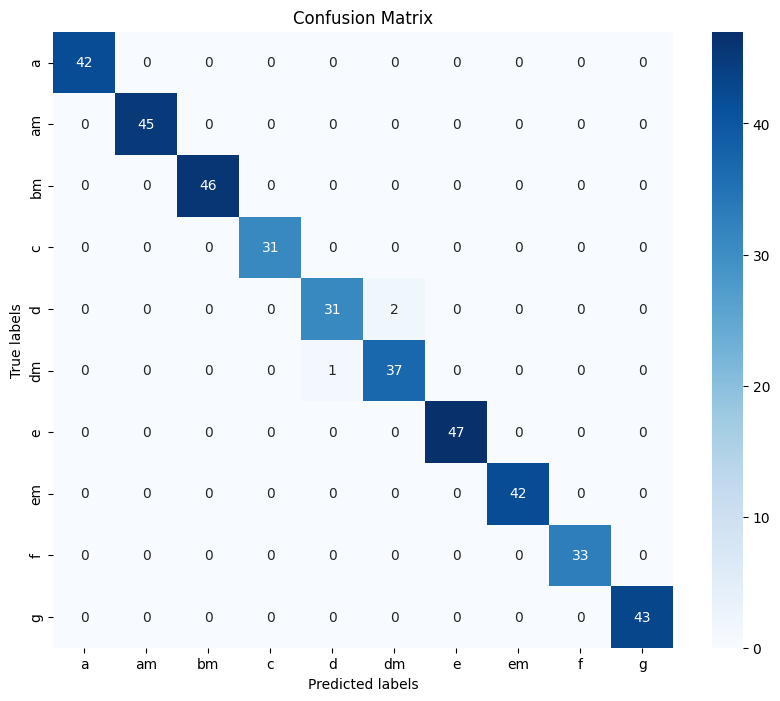

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#Saving the model

In [15]:
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

scaler_filename = 'scaler.save'
joblib.dump(scaler, scaler_filename)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

classifier_filename = 'classifier.save'
joblib.dump(clf, classifier_filename)


['classifier.save']

#Onset Detection

In [16]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [20]:
song_path='/content/about a girl.wav'

In [21]:
x, sr = librosa.load(song_path)

In [22]:
ipd.Audio(x, rate=sr)

In [23]:
onset_frames = librosa.onset.onset_detect(y=x, sr=sr, units='time')
print(onset_frames)

[ 0.09287982  0.65015873  0.95201814  1.11455782  1.57895692  1.88081633
  2.08979592  2.53097506  3.0185941   3.4829932   3.97061224  4.43501134
  4.71365079  4.89941043  4.94585034  5.41024943  5.57278912  5.87464853
  6.36226757  6.84988662  7.31428571  7.59292517  7.82512472  8.28952381
  8.7539229   8.80036281  9.2647619   9.52018141  9.75238095 10.24
 10.70439909 11.19201814 11.44743764 11.67963719 12.14403628 12.39945578
 12.60843537 13.09605442 13.28181406 13.37469388 13.56045351 14.04807256
 14.32671202 14.51247166 15.0000907  15.16263039 15.2555102 ]


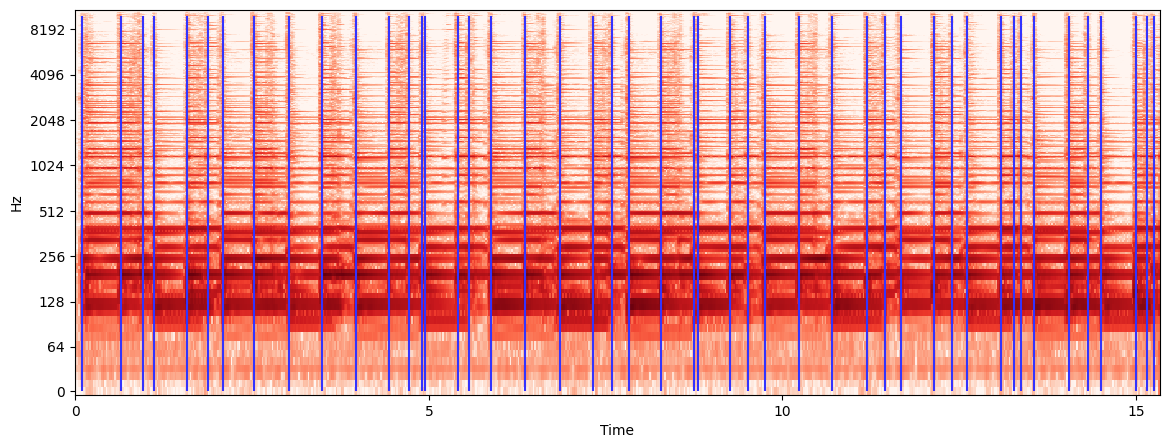

In [24]:
S = librosa.stft(x)
logS = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log', cmap='Reds')
plt.vlines(onset_frames, 0, 10000, color='#3333FF')

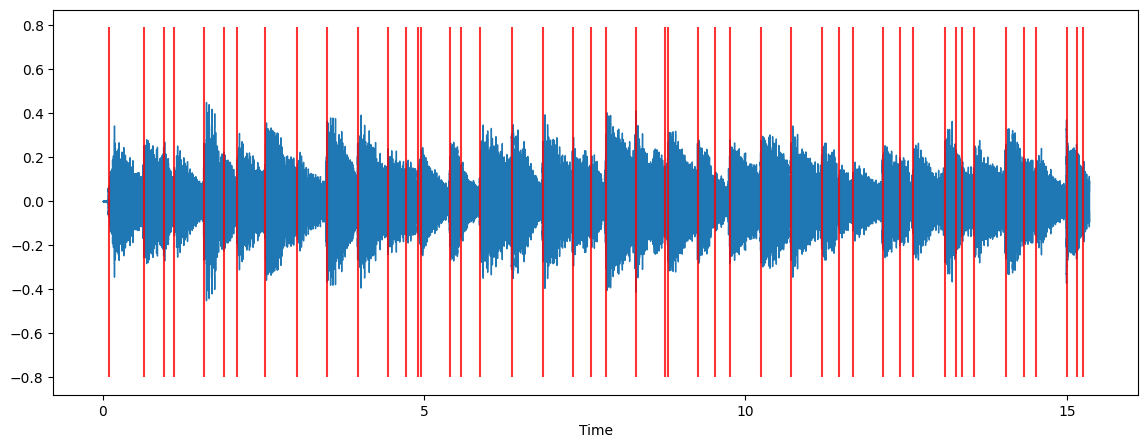

In [25]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.vlines(onset_frames, -0.8, 0.79, color='r', alpha=0.8)

#Sampling the audio file and predicting the note played in each sample

In [26]:
def extract_mel_spectrogram_features_pred(y,sr, n_mels=128, fmax=8000):
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, fmax=fmax)
    S_dB = librosa.power_to_db(S, ref=np.max)
    mel_mean = np.mean(S_dB, axis=1)
    mel_std = np.std(S_dB, axis=1)
    mel_median = np.median(S_dB, axis=1)
    mel_features = np.concatenate((mel_mean, mel_std, mel_median))
    return mel_features

def extract_features_pred(y,sr, n_mfcc=13):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)


In [27]:
import joblib
import numpy as np
import librosa

def predict_chord(y,sr, scaler_path='scaler.save', classifier_path='classifier.save'):
    scaler = joblib.load(scaler_path)
    clf = joblib.load(classifier_path)
    mfcc = extract_features_pred(y,sr)
    spectro = extract_mel_spectrogram_features_pred(y,sr)
    features=  np.hstack((mfcc, spectro))
    features_scaled = scaler.transform([features])
    prediction = clf.predict(features_scaled)
    return prediction[0]



In [28]:
nn = len(onset_frames)
avg=0
for i in range(1,nn):
  avg+=onset_frames[i]-onset_frames[i-1]
avg=avg/(nn--1)

In [29]:

def sample_audio_at_times(audio_file, times, window_size=avg):
    y, sr = librosa.load(audio_file, sr=None)
    samples = []
    half_window_samples = int(window_size * sr / 2)

    for time in times:
        center_sample = int(time * sr)
        start_sample = max(center_sample - half_window_samples, 0)
        end_sample = min(center_sample + half_window_samples, len(y))

        sample_y = y[start_sample:end_sample]

        if len(sample_y) < 2 * half_window_samples:
            padding = 2 * half_window_samples - len(sample_y)
            sample_y = np.pad(sample_y, (0, padding), 'constant')

        samples.append(predict_chord(sample_y, sr))

    return samples

times = onset_frames
sampled_audio = sample_audio_at_times(song_path, times)

print(sampled_audio)

['e', 'em', 'em', 'em', 'g', 'g', 'em', 'em', 'dm', 'g', 'em', 'dm', 'dm', 'em', 'em', 'em', 'g', 'em', 'em', 'em', 'bm', 'em', 'em', 'em', 'em', 'em', 'g', 'g', 'em', 'em', 'em', 'd', 'dm', 'dm', 'em', 'em', 'em', 'g', 'g', 'd', 'em', 'em', 'em', 'em', 'g', 'g', 'g']


#Chords with Timestamp

In [32]:
for i in range(nn):
  min = onset_frames[i]//60
  sec = round(onset_frames[i]-min, 2)
  print(f"time {min}:{sec} ==  {sampled_audio[i]} ")

time 0.0:0.09 ==  e 
time 0.0:0.65 ==  em 
time 0.0:0.95 ==  em 
time 0.0:1.11 ==  em 
time 0.0:1.58 ==  g 
time 0.0:1.88 ==  g 
time 0.0:2.09 ==  em 
time 0.0:2.53 ==  em 
time 0.0:3.02 ==  dm 
time 0.0:3.48 ==  g 
time 0.0:3.97 ==  em 
time 0.0:4.44 ==  dm 
time 0.0:4.71 ==  dm 
time 0.0:4.9 ==  em 
time 0.0:4.95 ==  em 
time 0.0:5.41 ==  em 
time 0.0:5.57 ==  g 
time 0.0:5.87 ==  em 
time 0.0:6.36 ==  em 
time 0.0:6.85 ==  em 
time 0.0:7.31 ==  bm 
time 0.0:7.59 ==  em 
time 0.0:7.83 ==  em 
time 0.0:8.29 ==  em 
time 0.0:8.75 ==  em 
time 0.0:8.8 ==  em 
time 0.0:9.26 ==  g 
time 0.0:9.52 ==  g 
time 0.0:9.75 ==  em 
time 0.0:10.24 ==  em 
time 0.0:10.7 ==  em 
time 0.0:11.19 ==  d 
time 0.0:11.45 ==  dm 
time 0.0:11.68 ==  dm 
time 0.0:12.14 ==  em 
time 0.0:12.4 ==  em 
time 0.0:12.61 ==  em 
time 0.0:13.1 ==  g 
time 0.0:13.28 ==  g 
time 0.0:13.37 ==  d 
time 0.0:13.56 ==  em 
time 0.0:14.05 ==  em 
time 0.0:14.33 ==  em 
time 0.0:14.51 ==  em 
time 0.0:15.0 ==  g 
time 0.0:15.

#Other models we tried

In [4]:
import numpy as np
import os
import librosa
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X, y = shuffle(X, y, random_state=75)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

clf = RandomForestClassifier(n_estimators=70, random_state=75)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.9825


1) Applying GMM

In [6]:
from sklearn.mixture import GaussianMixture

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train_flatten = np.reshape(X_train, (X_train.shape[0], -1))
X_test_flatten = np.reshape(X_test, (X_test.shape[0], -1))

n_components = 3  # Number of components in GMM
gmm = GaussianMixture(n_components=n_components, covariance_type='full', max_iter=1000)
gmm.fit(X_train_flatten)

y_pred_train = gmm.predict(X_train_flatten)
y_pred_test = gmm.predict(X_test_flatten)

y_train_labels = np.zeros(X_train.shape[0])
y_test_labels = np.zeros(X_test.shape[0])

accuracy_train = accuracy_score(y_train_labels, y_pred_train)
accuracy_test = accuracy_score(y_test_labels, y_pred_test)

print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.299375
Accuracy on test set: 0.085


2) Applying KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_flatten, y_train_labels)

y_pred_train_knn = knn.predict(X_train_flatten)
y_pred_test_knn = knn.predict(X_test_flatten)

accuracy_train_knn = accuracy_score(y_train_labels, y_pred_train_knn)
accuracy_test_knn = accuracy_score(y_test_labels, y_pred_test_knn)

print("Accuracy on train set (KNN):", accuracy_train_knn)
print("Accuracy on test set (KNN):", accuracy_test_knn)


Accuracy on train set (KNN): 1.0
Accuracy on test set (KNN): 1.0


3) Applying Support vector classification

In [8]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
for i in range(0,20):
  X, y = shuffle(X, y, random_state=75)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

  clf = SVC(kernel='linear', C=1.0, random_state=75)
  clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)


Accuracy: 0.9975
Accuracy: 0.9925
Accuracy: 0.9925
Accuracy: 0.99
Accuracy: 0.9925
Accuracy: 0.9925
Accuracy: 0.9925
Accuracy: 0.9925
Accuracy: 0.9875
Accuracy: 0.9925
Accuracy: 0.98
Accuracy: 0.9925
Accuracy: 0.9875
Accuracy: 0.9875
Accuracy: 0.9875
Accuracy: 0.995
Accuracy: 0.9925
Accuracy: 0.995
Accuracy: 0.9975
Accuracy: 0.99


4)

In [9]:
import glob
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import librosa

def extract_features(file_path, num_mfcc=13):
    y, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)
    return mfccs.flatten()


X, y = shuffle(X, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if len(X_train) == 0:
    raise ValueError("Train set is empty. Adjust test_size or provide more data.")

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.99


In [10]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

def extract_features(audio_file, n_mfcc=13):
    y, sr = librosa.load(audio_file)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return np.mean(mfcc, axis=1)


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/500
45/45 [==============================] - 1s 7ms/step - loss: 14.0729 - accuracy: 0.1951 - val_loss: 2.0166 - val_accuracy: 0.4375
Epoch 2/500
45/45 [==============================] - 0s 3ms/step - loss: 1.7931 - accuracy: 0.4750 - val_loss: 1.0943 - val_accuracy: 0.6313
Epoch 3/500
45/45 [==============================] - 0s 3ms/step - loss: 0.8626 - accuracy: 0.7104 - val_loss: 0.7000 - val_accuracy: 0.7688
Epoch 4/500
45/45 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.8153 - val_loss: 0.7008 - val_accuracy: 0.7563
Epoch 5/500
45/45 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8743 - val_loss: 0.4081 - val_accuracy: 0.9062
Epoch 6/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.9014 - val_loss: 0.2536 - val_accuracy: 0.9062
Epoch 7/500
45/45 [==============================] - 0s 3ms/step - loss: 0.3585 - accuracy: 0.8833 - val_loss: 0.4532 - val_accuracy: 0.8813
Epoch 8/500
